### Grading
This week's lab doesn't have any auto-graded components. Each question in this notebook has an accompanying Peer Review question. Although the lab shows as being ungraded, you need to complete the notebook to answer the Peer Review questions. <br>
**DO NOT CHANGE VARIABLE OR METHOD SIGNATURES** 

### Validate Button
This week's lab doesn't have any auto-graded components. Each question in this notebook has an accompanying Peer Review question. Although the lab shows as being ungraded, you need to complete the notebook to answer the Peer Review questions. 

You do not need to use the Validate button for this lab since there are no auto-graded components. If you hit the Validate button, it will time out given the number of visualizations in the notebook. Cells with longer execution times cause the validate button to time out and freeze. ***This notebook's Validate button time-out does not affect the final submission grading.*** 

# Clustering RNA sequences to identify cancer types

In this assignment, we will use clustering algorithms on RNA sequence data to identify cancer types.
Since the [whole data](https://www.synapse.org/#!Synapse:syn4301332) (from [Cancer Genome Atlas Pan-Cancer project](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3919969/)) is very big, we will use a [subset data from UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#). The subset data contains only 5 labels; BRCA, KIRC, COAD, LUAD and PRAD. The meanings of those labels are as below.

|Abbreviation|Cancer|
|:----:|:-------:|
|LUSC|Lung squamous cell carcinoma |
|READ |Rectum adenocarcinoma |
|GBM |Glioblastoma multiforme|
|BLCA |Bladder Urothelial Carcinoma|
|UCEC |Uterine Corpus Endometrioid Carcinoma|
|COAD |Colon adenocarcinoma|
|OV |Ovarian serous cystadenocarcinoma|
|LAML |Acute Myeloid Leukemia|
|HNSC |Head and Neck squamous cell carcinoma|
|LUAD |Lung adenocarcinoma|
|BRCA |Breast invasive carcinoma|
|KIRC |Kidney renal clear cell carcinoma|

Although we can use the data for supervised learning model training, we will not use these labels for training, but use them for evaluation.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [3]:
# Read data. Do not change the variable names (data, label)
data = pd.read_csv('data/data.csv')
label = pd.read_csv('data/labels.csv')
data=data.drop('Unnamed: 0',axis=1)
label=label.drop('Unnamed: 0',axis=1)

### A. [Peer Review] Perform basic data inspection or EDA on the pandas dataframe.
- How many observations?
- How many features?

In [5]:
# perform basic data inspection such as getting the number of observations and number of features
# you can also display part of the dataframe or run data.info() 
# your code here
#801 rows (observations/samples)
#20531 columns (features) (gene_0 to gene_20530)
print("Data shape:", data.shape)
print("Label shape:", label.shape)
print("Data info:")
print(data.info())
print("Label info:")
print(label.info())
data.head()

Data shape: (801, 20531)
Label shape: (801, 1)
Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5 MB
None
Label info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   801 non-null    object
dtypes: object(1)
memory usage: 6.4+ KB
None


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


- Draw histograms of mean, max and min values in each feature. You may see numbers around 0-20. What do those numbers mean? (We do not expect students to know or figure out the meanings, but if you do know by chance, feel free to discuss them with the class on the discussion board.) <br>
Answer the Peer Review question about this section. 

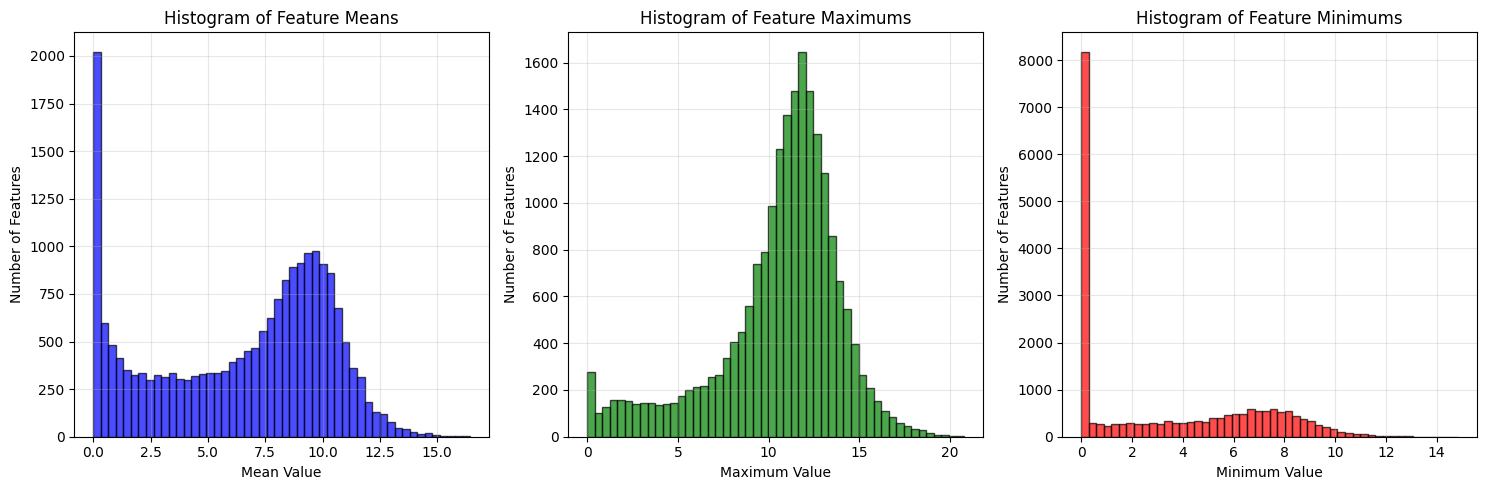

In [8]:
# draw histograms of mean, max and min values in each feature 
# your code here
# Create histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Draw histograms of mean, max and min values in each feature
# Calculate statistics for each feature (column)
feature_means = data.mean(axis=0, skipna=True)  # Mean across observations for each feature
feature_maxs = data.max(axis=0, skipna=True)    # Max across observations for each feature
feature_mins = data.min(axis=0, skipna=True)    # Min across observations for each feature

# Histogram of feature means
axes[0].hist(feature_means, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Histogram of Feature Means')
axes[0].set_xlabel('Mean Value')
axes[0].set_ylabel('Number of Features')
axes[0].grid(True, alpha=0.3)

# Histogram of feature maximums
axes[1].hist(feature_maxs, bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Histogram of Feature Maximums')
axes[1].set_xlabel('Maximum Value')
axes[1].set_ylabel('Number of Features')
axes[1].grid(True, alpha=0.3)

# Histogram of feature minimums
axes[2].hist(feature_mins, bins=50, alpha=0.7, color='red', edgecolor='black')
axes[2].set_title('Histogram of Feature Minimums')
axes[2].set_xlabel('Minimum Value')
axes[2].set_ylabel('Number of Features')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- If we were to train a "supervised" learning model, how would you deal with such large feature dimension? 
- Even after feature dimension reduction, still the number of useful features may be enormous. How it would impact performance or runtime of certain supervised learning algorithms? Which algorithms would suffer from high dimension features than others and why? 
- How it would impact performance or runtime of an unsupervised learning algorithm?
- Draw histograms of mean, max and min values in each feature. You may see numbers around 0-20. What those numbers mean? (We do not expect students to know or figure out the meanings, but if you do know by chance, feel free to discuss them with the class on the discussion board.) <br> <br>
Anwer these questions in this week's Peer Review assignment. 

### B. [Peer Review] Build a hierarchical clustering model
Let's build a model using hierarchical clustering. Hierarchical clustering module is available from `sklearn.cluster.AgglomerativeClustering`. You can choose linkage type and metric. Please check its documentation for more details.

**a) Number of clusters vs distance threshold**
Oftentimes hierarchical clustering does not need to know the number of clusters in advance. Instead, one needs to choose threshold distance/similarity to cut the dendrogram later. The AgglomerativeClustering module lets you specify either the number of clusters (n_clusters) or the threshold (distance_threshold). Based on our data, which should we choose to set to which value and why? <br> <br>
Answer this question in the Peer Review assignment. 

#### b) Guess which metric?
Can you guess which metric to use (distance-based vs. similarity-based) and why? 
This question is not graded, but we encourage you to share your thoughts with the class. See the ungraded discussion prompt for this week's material. 

#### c) Build a model
Build a model using n_clusters=5 option. Choose any metric and linkage type at first. Display the clustering result labels (you can just print out the result). Do not change the variable (model) name. Answer the question about this section in the Peer Review.

In [32]:
# build a model using n_clusters=5 option
model=None
# your code here
# For gene expression data, we need to determine the number of clusters
# Let's check the actual classes in the labels
n=5
hc_ward = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward',      # Ward minimizes within-cluster variance
    metric='euclidean'
)
model = hc_ward.fit(data)


#### d) Label permuation
In clustering, the labels get assigned randomly, so the label numbering won't match the ground truth necessarily. Write a function below to find best matching label ordering based on the accuracy. Do not change the variable names. Answer the question about this section in the Peer Review. 

In [33]:
import itertools

def label_permute_compare(ytdf,yp,n=5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """

    # Convert dataframe to numpy array for easier handling
    yt = ytdf.values.flatten() if hasattr(ytdf, 'values') else ytdf
    
    # Get unique labels from ground truth and predictions
    unique_true = np.unique(yt)
    unique_pred = np.unique(yp)
    
    # Ensure we have the same number of unique labels
    n_classes = len(unique_true)
    
    # Create mapping from string labels to integers if needed
    true_label_to_int = {label: i for i, label in enumerate(unique_true)}
    yt_int = np.array([true_label_to_int[label] for label in yt])
    
    # Try all possible permutations of predicted labels
    best_accuracy = 0
    best_permutation = None
    
    # Generate all permutations of predicted cluster labels
    for perm in itertools.permutations(range(n_classes)):
        # Create mapping from old predicted labels to new labels based on permutation
        yp_permuted = np.zeros_like(yp)
        for i, new_label in enumerate(perm):
            yp_permuted[yp == i] = new_label
        
        # Calculate accuracy for this permutation
        accuracy = accuracy_score(yt_int, yp_permuted)
        
        # Keep track of best permutation
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_permutation = perm
    
    return best_permutation, best_accuracy



In [34]:
labelorder, acc = label_permute_compare(label, model.labels_)
print(labelorder, acc)

(0, 2, 4, 3, 1) 0.9950062421972534


#### e) Check confusion matrix
Use sklearn's confusion matrix and display the results. Answer the Peer Review question about this section.  

In [38]:
# display confusion matrix here 
# your code here
# Find best permutation and accuracy
unique_true = np.unique(label['Class'])
true_label_to_int = {label: i for i, label in enumerate(unique_true)}
yt_int = np.array([true_label_to_int[lbl] for lbl in label['Class']])
yp_final = np.zeros_like(model.labels_)
for i, new_label in enumerate(labelorder):
    yp_final[model.labels_ == i] = new_label
    
cm = confusion_matrix(yt_int, yp_final)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[299   0   0   1   0]
 [  0  77   0   1   0]
 [  0   0 146   0   0]
 [  2   0   0 139   0]
 [  0   0   0   0 136]]


#### f) Change linkage method and distance metric. Which ones lead the best performance? Print out the accuracy and confusion matrix for the best model.
<br> Answer the Peer Review questions about this section. 

In [40]:
# programmatically evaluate which linkage method and distance metric lead to the best performance
# your code here


# For gene expression data, we need to determine the number of clusters
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import itertools


def label_permute_compare(ytdf,yp,n=5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
    # Convert dataframe to numpy array for easier handling
    yt = ytdf.values.flatten() if hasattr(ytdf, 'values') else ytdf
    
    # Get unique labels from ground truth and predictions
    unique_true = np.unique(yt)
    unique_pred = np.unique(yp)
    
    # Ensure we have the same number of unique labels
    n_classes = len(unique_true)
    
    # Create mapping from string labels to integers if needed
    true_label_to_int = {label: i for i, label in enumerate(unique_true)}
    yt_int = np.array([true_label_to_int[label] for label in yt])
    
    # Try all possible permutations of predicted labels
    best_accuracy = 0
    best_permutation = None
    
    # Generate all permutations of predicted cluster labels
    for perm in itertools.permutations(range(n_classes)):
        # Create mapping from old predicted labels to new labels based on permutation
        yp_permuted = np.zeros_like(yp)
        for i, new_label in enumerate(perm):
            yp_permuted[yp == i] = new_label
        
        # Calculate accuracy for this permutation
        accuracy = accuracy_score(yt_int, yp_permuted)
        
        # Keep track of best permutation
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_permutation = perm
    
    return best_permutation, best_accuracy

def create_confusion_matrix(ytdf, yp, labelorder):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    labelorder: best permutation of labels
    Returns confusion matrix.
    """
    # Convert dataframe to numpy array for easier handling
    yt = ytdf.values.flatten() if hasattr(ytdf, 'values') else ytdf
    
    # Get unique labels from ground truth
    unique_true = np.unique(yt)
    
    # Create mapping from string labels to integers if needed
    true_label_to_int = {label: i for i, label in enumerate(unique_true)}
    yt_int = np.array([true_label_to_int[label] for label in yt])
    
    # Apply the best permutation to get the final predicted labels
    yp_final = np.zeros_like(yp)
    for i, new_label in enumerate(labelorder):
        yp_final[yp == i] = new_label
    
    # Create confusion matrix
    cm = confusion_matrix(yt_int, yp_final)
    
    return cm

def hierarchical_clustering_analysis(linkage_method='ward', n_clusters=5, metric='euclidean'):
    ac_complete = AgglomerativeClustering(
      n_clusters=n_clusters,
      linkage=linkage_method,
      metric=metric
    )
    model = ac_complete.fit(data)
    return model


# For gene expression data, we need to determine the number of clusters

# Read data. Do not change the variable names (data, label)
data = pd.read_csv('data/data.csv')
label = pd.read_csv('data/labels.csv')
data=data.drop('Unnamed: 0',axis=1)
label=label.drop('Unnamed: 0',axis=1)

# Build hierarchical clustering model
print("Building Hierarchical Clustering Model...")
print("Data shape:", data.shape)

n_clusters = 5

linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

best_accuracy = 0
best_labelorder = None
best_cm = None
best_linkage = None
best_metric = None

# Loop through all valid combinations
for linkage_method in linkage_methods:
    for metric in metrics:
        # Ward linkage only works with euclidean metric
        if linkage_method == 'ward' and metric != 'euclidean':
            continue
            
        print(f"Testing: linkage={linkage_method}, metric={metric}")
        
        try:
            model = hierarchical_clustering_analysis(n_clusters=n_clusters, linkage_method=linkage_method, metric=metric)
            labelorder, acc = label_permute_compare(label, model.labels_)
            
            if acc > best_accuracy:
                best_accuracy = acc
                best_labelorder = labelorder
                best_linkage = linkage_method
                best_metric = metric
                best_cm = create_confusion_matrix(label, model.labels_, labelorder)
                
        except Exception as e:
            # Skip invalid combinations
            continue

print(f"\nBest combination: linkage={best_linkage}, metric={best_metric}")
print(f"labelorder: {best_labelorder}, acc: {best_accuracy}")
print("\nConfusion Matrix:")

# Get unique classes for labeling
unique_classes = np.unique(label['Class'])

# Print confusion matrix with class labels and accuracy
for i, row in enumerate(best_cm):
    class_name = unique_classes[i]
    correct = best_cm[i, i]
    total = best_cm[i, :].sum()
    accuracy_pct = (correct / total) * 100
    
    # Format row as clean integers
    row_list = [int(x) for x in row]
    row_str = str(row_list)
    print(f"{row_str}    # {class_name}: {correct}/{total} correct ({accuracy_pct:.2f}%)")


Building Hierarchical Clustering Model...
Data shape: (801, 20531)
Testing: linkage=ward, metric=euclidean
Testing: linkage=complete, metric=euclidean
Testing: linkage=complete, metric=l1
Testing: linkage=complete, metric=l2
Testing: linkage=complete, metric=manhattan
Testing: linkage=complete, metric=cosine
Testing: linkage=average, metric=euclidean
Testing: linkage=average, metric=l1
Testing: linkage=average, metric=l2
Testing: linkage=average, metric=manhattan
Testing: linkage=average, metric=cosine
Testing: linkage=single, metric=euclidean
Testing: linkage=single, metric=l1
Testing: linkage=single, metric=l2
Testing: linkage=single, metric=manhattan
Testing: linkage=single, metric=cosine

Best combination: linkage=ward, metric=euclidean
labelorder: (0, 2, 4, 3, 1), acc: 0.9950062421972534

Confusion Matrix:
[299, 0, 0, 1, 0]    # BRCA: 299/300 correct (99.67%)
[0, 77, 0, 1, 0]    # COAD: 77/78 correct (98.72%)
[0, 0, 146, 0, 0]    # KIRC: 146/146 correct (100.00%)
[2, 0, 0, 139, 0]

### C. What about k-means clustering?
Can we apply kmeans clustering on this data? Which clustering methods give a better performance? Is kmeans faster or slower?

In [42]:
# try to apply kmeans clustering on this data
# time kmeans to compare to hierarchical clustering 
# your code here
# Test KMeans clustering with different parameters
kmeans_results = []
print("Testing KMeans clustering...")

# Test different random states and initialization methods
init_methods = ['k-means++', 'random']
random_states = [42, 0, 123, 456, 789]

best_kmeans_accuracy = 0
best_kmeans_labelorder = None
best_kmeans_cm = None
best_kmeans_params = None

for init_method in init_methods:
    for random_state in random_states:
        print(f"Testing KMeans: init={init_method}, random_state={random_state}")
        
        start_time = time.time()
        kmeans = KMeans(n_clusters=n_clusters, init=init_method, random_state=random_state, n_init=10)
        kmeans_labels = kmeans.fit_predict(data)
        kmeans_time = time.time() - start_time
        
        # Find best permutation for KMeans
        labelorder_km, acc_km = label_permute_compare(label, kmeans_labels)
        
        if acc_km > best_kmeans_accuracy:
            best_kmeans_accuracy = acc_km
            best_kmeans_labelorder = labelorder_km
            best_kmeans_cm = create_confusion_matrix(label, kmeans_labels, labelorder_km)
            best_kmeans_params = f"init={init_method}, random_state={random_state}"
        
        kmeans_results.append({
            'method': 'KMeans',
            'params': f"init={init_method}, rs={random_state}",
            'accuracy': acc_km,
            'time': kmeans_time
        })

print(f"\nBest KMeans: {best_kmeans_params}")
print(f"labelorder: {best_kmeans_labelorder}, acc: {best_kmeans_accuracy}")
print("\nKMeans Confusion Matrix:")
for i, row in enumerate(best_kmeans_cm):
    class_name = unique_classes[i]
    correct = best_kmeans_cm[i, i]
    total = best_kmeans_cm[i, :].sum()
    accuracy_pct = (correct / total) * 100
    
    row_list = [int(x) for x in row]
    row_str = str(row_list)
    print(f"{row_str}    # {class_name}: {correct}/{total} correct ({accuracy_pct:.2f}%)")

# Time the best hierarchical method specifically
start_time = time.time()
hc_model = hierarchical_clustering_analysis(n_clusters=n_clusters, linkage_method=best_linkage, metric=best_metric)
hc_time = time.time() - start_time

# Time the best KMeans method
start_time = time.time()
km_model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
km_model.fit(data)
km_time = time.time() - start_time

print(f"Hierarchical Clustering (Ward+Euclidean): {hc_time:.3f} seconds")
print(f"KMeans (best config): {km_time:.3f} seconds")
print(f"Speed ratio: KMeans is {hc_time/km_time:.1f}x faster than Hierarchical")

print("\nAccuracy Comparison:")
print(f"Hierarchical Clustering (Ward+Euclidean): {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"KMeans (best config): {best_kmeans_accuracy:.4f} ({best_kmeans_accuracy*100:.2f}%)")


Testing KMeans clustering...
Testing KMeans: init=k-means++, random_state=42
Testing KMeans: init=k-means++, random_state=0
Testing KMeans: init=k-means++, random_state=123
Testing KMeans: init=k-means++, random_state=456
Testing KMeans: init=k-means++, random_state=789
Testing KMeans: init=random, random_state=42
Testing KMeans: init=random, random_state=0
Testing KMeans: init=random, random_state=123
Testing KMeans: init=random, random_state=456
Testing KMeans: init=random, random_state=789

Best KMeans: init=random, random_state=42
labelorder: (2, 0, 4, 1, 3), acc: 0.9950062421972534

KMeans Confusion Matrix:
[300, 0, 0, 0, 0]    # BRCA: 300/300 correct (100.00%)
[0, 77, 0, 1, 0]    # COAD: 77/78 correct (98.72%)
[1, 0, 145, 0, 0]    # KIRC: 145/146 correct (99.32%)
[2, 0, 0, 139, 0]    # LUAD: 139/141 correct (98.58%)
[0, 0, 0, 0, 136]    # PRAD: 136/136 correct (100.00%)
Hierarchical Clustering (Ward+Euclidean): 2.144 seconds
KMeans (best config): 2.587 seconds
Speed ratio: KMeans

In [43]:
!python -V

Python 3.13.2


In [44]:
import sklearn
print(sklearn.__version__)


1.7.2
